In [1]:
%matplotlib
from imgseries import ContourTracking

Using matplotlib backend: Qt5Agg


In [2]:
basefolder = 'data'  # where analysis data etc. will be saved into and loaded from
folders = 'data/img1', 'data/img2'

# Minimal analysis

In [3]:
ct = ContourTracking(folders, savepath=basefolder)

# or, if working with a stack : ct = ContourTracking(stack='stack.tif', savepath=basefolder)

The line below assumes that contours to follow have already been defined and saved in the metadata file (see details further below)

In [4]:
ct.contours.load()

Now, run analysis on these zones.

In [8]:
ct.run(start=10, end=12)

100%|████████████████████████████████████████████████████| 2/2 [00:00<00:00, 54.31it/s]


Results are stored in the `data` attribute, which is a pandas DataFrame (times are automatically extracted from image creation date, but can be modified, see further below)). `x, y` represent position, `p` perimeter and `a` signed area (see **Examples_Basics.ipynb**)

*Note*: if contour detection fails at some point, `data` will contain `NaN` (`numpy.nan`) at the corresponding locations.

In [6]:
ct.data.head()

,folder,filename,time (unix),x1,y1,p1,a1,x2,y2,p2,a2,x3,y3,p3,a3
num,,,,,,,,,,,,,,,
0,img1,img-00610.png,1.599832e+09,145.251,267.327,46.0369,-160.128,284.702,288.152,48.958,-185.469,325.13,250.302,38.6653,-114.198
1,img1,img-00611.png,1.599832e+09,145.442,267.145,46.0063,-159.428,284.505,287.874,48.8591,-183.976,324.794,250.113,38.6403,-114.315
2,img1,img-00612.png,1.599832e+09,145.579,267.039,45.838,-158.301,284.309,287.722,48.654,-183.415,324.466,250.032,38.5305,-113.964
3,img1,img-00613.png,1.599832e+09,145.71,266.866,45.5898,-157.406,284.088,287.5,48.6747,-182.387,324.121,249.888,38.3801,-112.646
4,img1,img-00614.png,1.599832e+09,145.808,266.703,45.4085,-156.23,283.871,287.296,48.609,-180.914,323.783,249.735,38.3274,-112.294


Plot perimeters of all detected particles (contours) as a function of time:

<AxesSubplot:xlabel='time (unix)'>

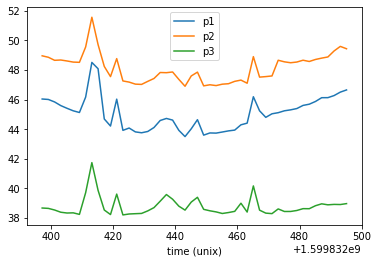

In [7]:
ct.data.set_index('time (unix)').filter(like='p').plot()

Save data in a tsv (tab-separated value) file, using default filename (filename can be set as a parameter if necessary, see further below). Metadata including contour info, path info, and code version info is also saved in a .json file at the same time. 

Before saving, make sure the timing info is correct for all images. If not, correct timing info, re-run the analysis, and call save().

In [9]:
ct.save()

In [7]:
print(ct.contour_data)

{1: {10: [array([150.        , 149.        , 148.        , 147.52      ,
       147.        , 146.        , 145.46153846, 145.        ,
       144.22222222, 144.        , 143.02325581, 143.        ,
       142.53333333, 142.        , 141.67924528, 141.23529412,
       141.        , 140.97142857, 140.58571429, 140.65306122,
       140.675     , 141.        , 141.06493506, 141.28333333,
       141.93478261, 142.        , 142.65217391, 143.        ,
       144.        , 145.        , 146.        , 147.        ,
       148.        , 148.2       , 149.        , 149.90740741,
       150.        , 151.        , 151.05405405, 152.        ,
       152.71014493, 153.        , 153.2962963 , 153.67164179,
       153.875     , 153.94444444, 153.98837209, 153.93150685,
       153.5       , 153.        , 152.91764706, 152.17647059,
       152.        , 151.        , 150.64      , 150.        ]), array([274.48484848, 274.58333333, 274.33333333, 274.        ,
       273.77966102, 273.21212121, 273.    

# Defining and viewing contours

In [9]:
ct = ContourTracking(folders, savepath=basefolder)

Defining contours has to be done at least once.

**Important**: Matplotlib must be in an interactive mode to do so.

Defining does not need to be done again in the following situations:
- calling methods again from the same `ct` object, e.g. `ct.run()`
- calling `ct.contours.load()` to load contours data from saved metadata (.json) file.

In [11]:
ct.contours.define(level=170)  # define one contour on the first image of the series, at grey level 170

In [12]:
ct.contours.define(170, n=3)  # define 3 contours on the first image of the series

In [13]:
ct.contours.define(170, 3, num=10)  # define 3 contours at level 170 on image #10 in the series

Viewing analysis zones after defining or loading them:

In [14]:
ct.contours.data

{'crop': (88, 55, 444, 415),
 'position': {'contour 1': (218.31989465535074, 295.04798549881775),
  'contour 2': (328.9898703929179, 249.8820309993573),
  'contour 3': (153.32159816523225, 266.7370221595187)},
 'level': 170,
 'image': 10}

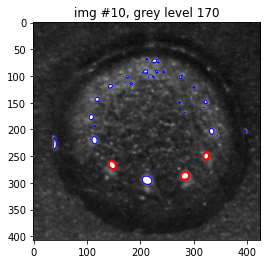

<AxesSubplot:title={'center':'img #10, grey level 170'}>

In [9]:
ct.contours.show()  # show contours on the image they have been defined on

**Note**: At the moment, saving contours selection data is done by calling `ct.save()`, which saves both data and metadata. Be careful because calling `ct.save()` also overwrites saved analysis data (potentially with no data if no analysis has been run yet). This makes sure that metadata in .json files actually corresponds to the data in the .tsv file.

# Load analysis data a posteriori

In [10]:
ct = ContourTracking(savepath=basefolder)  # no need to specify folders here
data = ct.load()
data.head()

,folder,filename,time (unix),x1,y1,p1,a1,x2,y2,p2,a2,x3,y3,p3,a3
num,,,,,,,,,,,,,,,
0,img1,img-00610.png,1.599832e+09,145.251492,267.326799,46.036864,-160.128147,284.701676,288.152126,48.957987,-185.468601,325.129679,250.301624,38.665283,-114.197905
1,img1,img-00611.png,1.599832e+09,145.442461,267.144853,46.006251,-159.428384,284.505070,287.873805,48.859149,-183.975793,324.793725,250.112964,38.640348,-114.315205
2,img1,img-00612.png,1.599832e+09,145.579403,267.039431,45.838039,-158.300515,284.309342,287.721604,48.653952,-183.414581,324.465835,250.031764,38.530501,-113.964489
3,img1,img-00613.png,1.599832e+09,145.709974,266.865536,45.589818,-157.406048,284.088273,287.500109,48.674727,-182.387011,324.121366,249.887547,38.380090,-112.645995
4,img1,img-00614.png,1.599832e+09,145.808415,266.702616,45.408452,-156.230077,283.870854,287.296299,48.609004,-180.913766,323.782641,249.734876,38.327407,-112.293929


If one wants to use contour selection methods as above, one must first reload the contour selection using saved data:

In [11]:
ct.contours.load()
ct.contours.data

{'crop': [94, 55, 425, 407],
 'position': {'contour 1': [147.32159816523225, 266.7370221595187],
  'contour 2': [283.43310772427566, 286.9812976172301],
  'contour 3': [322.9898703929179, 249.8820309993573]},
 'level': 170,
 'image': 10}

If one wants to show the zones on actual images, one must either specify `paths` in the `glevels` instanciation above, or reload the file info using the command below (the image files must still be present in the same location. If not use `load_info` with a specific filename containing updated file location):

In [12]:
ct.load_info()  # use default filename, or:
ct.load_info('Img_Files_Saved.tsv')

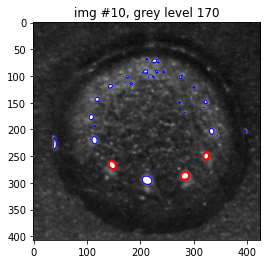

<AxesSubplot:title={'center':'img #10, grey level 170'}>

In [13]:
ct.contours.show()  # show zones on 10-th image

# Analyze only subset of images

See **Examples_GreyLevels.ipynb**, and replace:
- `GreyLevel` →  `ContourTracking`
- `zones` →  `contours`

# Manage image time information

See **Examples_GreyLevels.ipynb**, and replace `GreyLevel` with `ContourTracking` (or `ImgSeries`)

# Load / save with custom filenames

See **Examples_GreyLevels.ipynb**, and replace `GreyLevel` with  `ContourTracking`

# Access individual images

See **Examples_GreyLevels.ipynb**, and replace `GreyLevel` with `ContourTracking` (or `ImgSeries`)